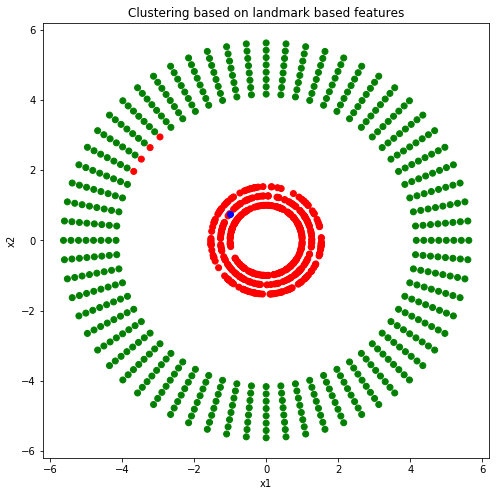

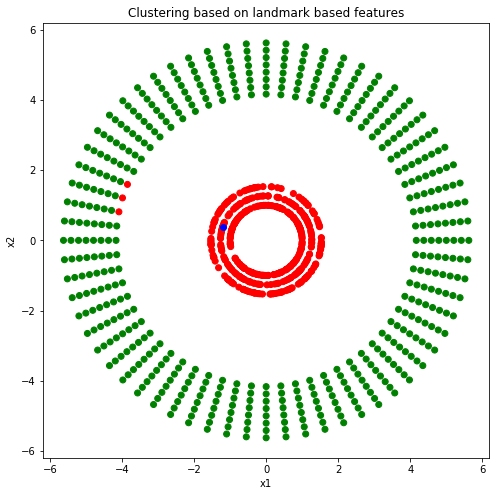

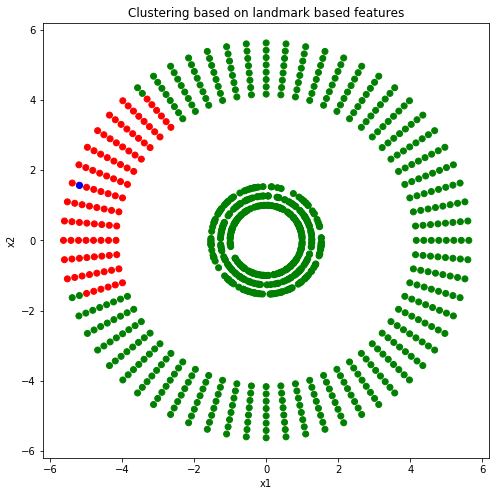

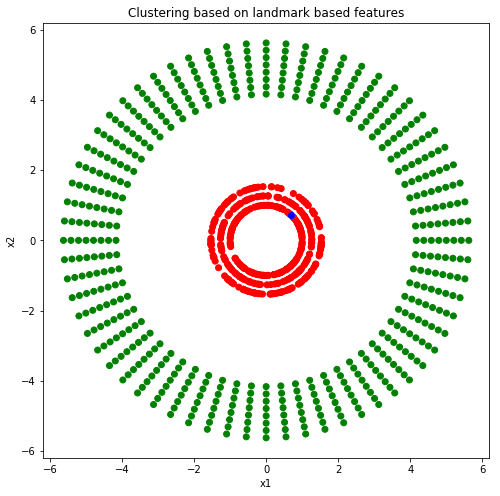

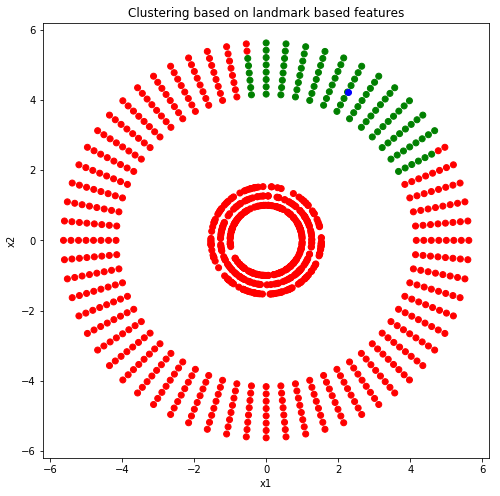

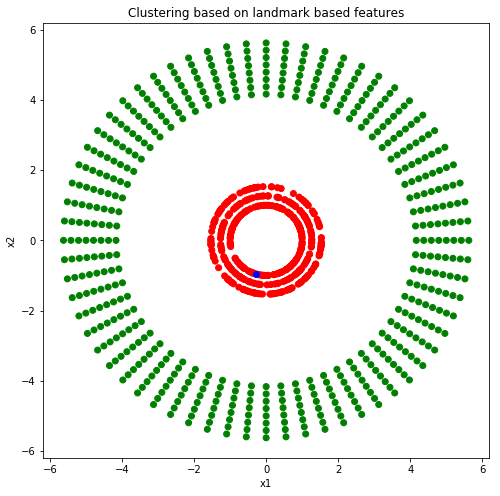

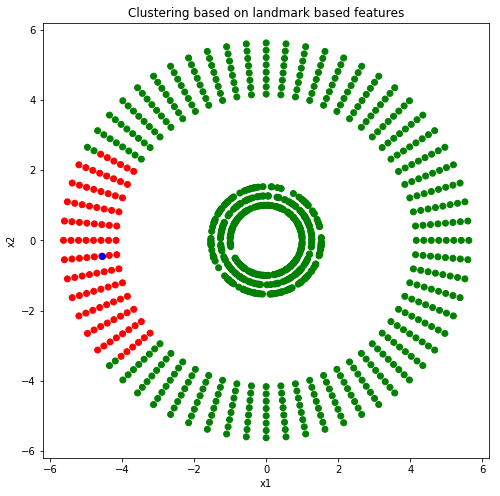

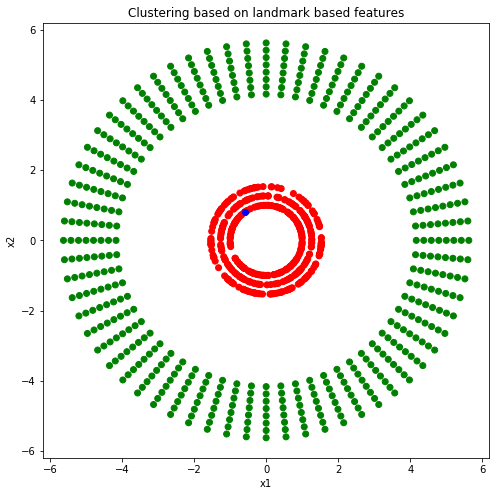

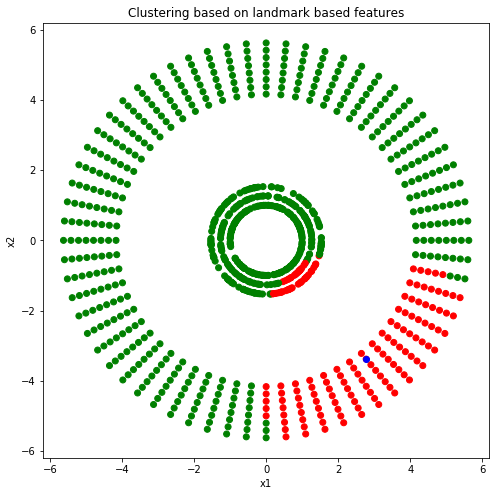

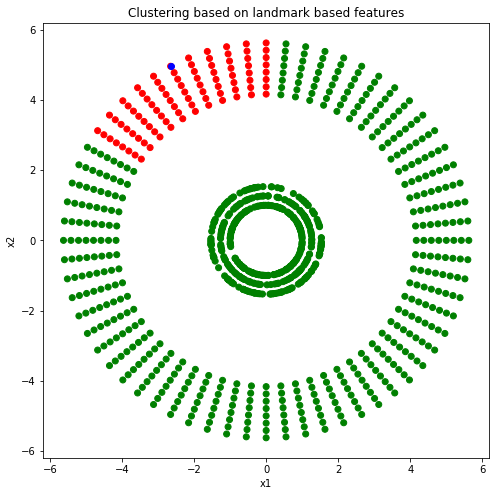

In [2]:
from __future__ import division, print_function, unicode_literals
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

#loading data
kmdata=np.loadtxt(fname='kmeans_data.txt',dtype=float,delimiter=None)

ld=pd.DataFrame(np.zeros(kmdata.shape[0]))#ld stores feature of each data along with the cluster id
ld[1]=np.zeros(kmdata.shape[0])

#Computing the landmark features
for i in range(0,10):
    r=np.random.randint(0,kmdata.shape[0])
    for j in range(0,kmdata.shape[0]):
        ld.loc[j][0]=np.exp(-0.1*((distance.euclidean(kmdata[r,:],kmdata[j,:]))**2))
        
    #k means
    d1=ld.loc[0,0]
    d2=ld.loc[1,0]
    c1=0
    c2=0
    while not(np.array_equal(c1,d1)) or not(np.array_equal(c2,d2)):
        c1=d1
        c2=d2
        for i in range(0,ld.shape[0]):
            if distance.euclidean(ld.loc[i,0],c1)<distance.euclidean(ld.loc[i,0],c2):
                ld.loc[i,1]=1
            else:
                ld.loc[i,1]=2
        mn=ld.groupby([1]).mean()
        #recomputing centres
        d1=list(mn.loc[1,:])
        d2=list(mn.loc[2,:])
        
    #plotting the data
    fig = plt.figure(figsize=(8,8))
    colors = ['red','green']
    matplotlib.pyplot.scatter(kmdata[:,0], kmdata[:,1], c=ld[1], cmap=matplotlib.colors.ListedColormap(colors))
    matplotlib.pyplot.plot(kmdata[r][0],kmdata[r][1],'bo')
    plt.title('Clustering based on landmark based features')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    